<a href="https://colab.research.google.com/github/prajwalpai/Upgrad-Assignments/blob/main/SO_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stack Overflow EDA on cloud Assignment

## Import libs

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read Data from AWS S3

In [93]:
qns = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv", encoding = "latin1")
ans = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv", encoding = "latin1")
tags = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv", encoding = "latin1")
users = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv" , encoding = "latin1")

## Check Basic Info of data

 

### Check Shape

In [94]:
qns.shape

(1264216, 7)

In [95]:
qns.sample()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
705768,24046660,2745013.0,2014-06-04T20:09:25Z,NaN,2,"AdMob taking space in layout, but no ad is act...",<p>First off - I've been reading through quest...


In [96]:
ans.shape

(2014516, 6)

In [97]:
ans.sample()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
1797763,35419772,298650.0,2016-02-15T21:51:22Z,35341770,0,"<p>You can <a href=""https://www.google.com/a/s..."


In [98]:
tags.shape

(3750994, 2)

In [99]:
tags.sample()

,Id,Tag
2527457,28761000,dexclassloader


In [100]:
users.shape

(1990480, 9)

### Check Sample 

In [101]:
users.sample()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
1421677,1421677,2332721,RST,2011-10-24 07:20:36.933 UTC,2018-09-20 20:48:07.307 UTC,3577,50,41,712


## Cleanup Data


### Remove Null

#### Remove null OwnerUserId in qns

In [102]:
qns = qns[~qns['OwnerUserId'].isnull()]

In [103]:
qns.isnull().sum()

Id                    0
OwnerUserId           0
CreationDate          0
ClosedDate      1194522
Score                 0
Title                 0
Body                  0
dtype: int64

#### Remove null OwnerUserId in ans

In [104]:
ans = ans[~ans['OwnerUserId'].isnull()]

In [105]:
ans.isnull().sum()

Id              0
OwnerUserId     0
CreationDate    0
ParentId        0
Score           0
Body            0
dtype: int64

#### Remove null Tags in tags

In [106]:
tags = tags[~tags['Tag'].isnull()]

In [107]:
tags.isnull().sum()

Id     0
Tag    0
dtype: int64

In [108]:
users.isnull().sum()

Unnamed: 0            0
id                    0
display_name        136
creation_date         0
last_access_date      0
reputation            0
up_votes              0
down_votes            0
views                 0
dtype: int64

#### Remove null display_name in users

In [109]:
users = users[~users['display_name'].isnull()]

In [110]:
users['id'].value_counts()

22656      3270
1144035    3009
29407      2144
548225     1924
115145     1813
           ... 
5588787       1
4138147       1
1417000       1
1427235       1
4098          1
Name: id, Length: 465436, dtype: int64

### Remove unnecessary Data

#### Remove "Unnamed: 0" column from users

In [111]:
users.drop('Unnamed: 0', axis=1, inplace= True)

#### Remove the duplicate rows from users

In [112]:
users.drop_duplicates(inplace = True)

In [113]:
users.isnull().sum()

id                  0
display_name        0
creation_date       0
last_access_date    0
reputation          0
up_votes            0
down_votes          0
views               0
dtype: int64

In [114]:
users

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


### Standardise Numbers

In [115]:
qns.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


#### Making OwnerUserId an integer

In [116]:
qns['OwnerUserId'] = qns['OwnerUserId'].astype(int)

In [117]:
ans['OwnerUserId'] = ans['OwnerUserId'].astype(int)

In [123]:
qns.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26,2008-08-01 13:57:07+00:00,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83,2008-08-01 15:50:08+00:00,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740,2008-08-01 18:42:19+00:00,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91,2008-08-01 23:22:08+00:00,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [124]:
ans.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50,2008-08-01 19:36:46+00:00,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91,2008-08-01 23:49:57+00:00,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49,2008-08-02 01:49:46+00:00,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [125]:
qns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   Id            1249762 non-null  int64              
 1   OwnerUserId   1249762 non-null  int64              
 2   CreationDate  1249762 non-null  datetime64[ns, UTC]
 3   ClosedDate    55240 non-null    object             
 4   Score         1249762 non-null  int64              
 5   Title         1249762 non-null  object             
 6   Body          1249762 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 76.3+ MB


In [121]:
tags.shape

(3749881, 2)

#### Change the Dates Columns type to DateType.

In [122]:
qns['CreationDate'] = pd.to_datetime(qns['CreationDate'])
ans['CreationDate'] = pd.to_datetime(ans['CreationDate'])

## Handling outliers 

### Outliers in Score in Questions/qns

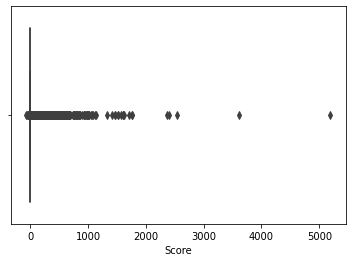

In [126]:
sns.boxplot(qns.Score)

In [127]:
qns = qns[qns.Score < 1200]

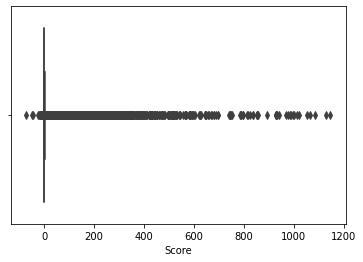

In [128]:
sns.boxplot(qns.Score)

In [129]:
qns.Score.describe()

count    1.249744e+06
mean     1.741049e+00
std      1.070463e+01
min     -7.300000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.147000e+03
Name: Score, dtype: float64

### Outliers in Score in Answers/ans

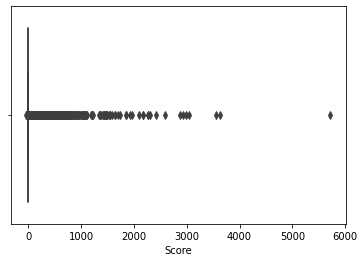

In [130]:
sns.boxplot(ans.Score)

In [131]:
ans = ans[ans.Score < 1100]

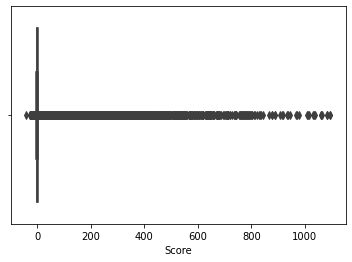

In [132]:
sns.boxplot(ans.Score)

In [133]:
ans.Score.describe()

count    2.001268e+06
mean     2.434043e+00
std      1.221149e+01
min     -4.200000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.095000e+03
Name: Score, dtype: float64

### Outliers in reputation in Users/users

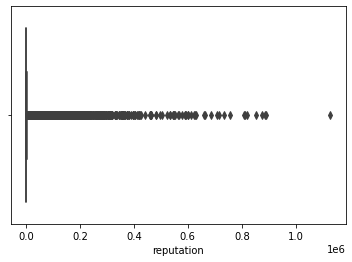

In [134]:
sns.boxplot(users.reputation)

In [135]:
users = users[users.reputation < 600000]

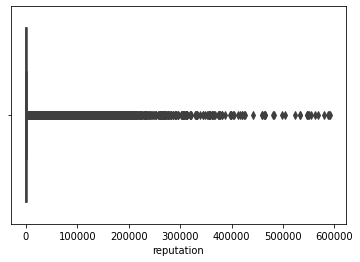

In [136]:
sns.boxplot(users.reputation)

In [137]:
users

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


## Prepping Join/Merge 


In [138]:
qns.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26,2008-08-01 13:57:07+00:00,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83,2008-08-01 15:50:08+00:00,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740,2008-08-01 18:42:19+00:00,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91,2008-08-01 23:22:08+00:00,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [139]:
qns.rename(columns={'Id':'Q_Id', 'OwnerUserId':'Q_OwnerUserId', 'CreationDate':'Q_CreationDate','ClosedDate':'Q_ClosedDate' }, inplace=True)
qns.rename(columns={'Score':'Q_Score', 'Title':'Q_Title', 'Body':'Q_Body' }, inplace=True)

### Renaming Questions columns with Q identifier

In [140]:
qns.head()

,Q_Id,Q_OwnerUserId,Q_CreationDate,Q_ClosedDate,Q_Score,Q_Title,Q_Body
0,80,26,2008-08-01 13:57:07+00:00,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83,2008-08-01 15:50:08+00:00,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740,2008-08-01 18:42:19+00:00,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91,2008-08-01 23:22:08+00:00,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [141]:
ans.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50,2008-08-01 19:36:46+00:00,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91,2008-08-01 23:49:57+00:00,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49,2008-08-02 01:49:46+00:00,260,28,"<p><a href=""http://www.codeproject.com/Article..."


###  Renaming Answers columns with A identifier

In [142]:
ans.rename(columns={'Id':'A_Id', 'OwnerUserId':'A_OwnerUserId', 'CreationDate':'A_CreationDate' }, inplace=True)
ans.rename(columns={'ParentId':'Q_Id','Score':'A_Score', 'Body':'A_Body' }, inplace=True)

In [143]:
ans.sample()

,A_Id,A_OwnerUserId,A_CreationDate,Q_Id,A_Score,A_Body
119940,2034378,187697,2010-01-09 18:19:39+00:00,2034360,3,"<p>From <a href=""http://www.windowskb.com/Uwe/..."


In [144]:
qns.sample()

,Q_Id,Q_OwnerUserId,Q_CreationDate,Q_ClosedDate,Q_Score,Q_Title,Q_Body
107033,4436570,541574,2010-12-14 06:40:24+00:00,NaN,0,Excel Macro Help - Stacking Macros,<p>I am using the following subroutine to comb...


### Cosolidating Tags as CSV values grouped by Question ID 

**Breaking up the below commented line to make sure processor is NOT taxed**

Had initiatlly tested with tags.head(5000) and worked well but running on entire dataframe execution almost made jupyter unresponsive.

In [145]:
#tags.groupby(['Id'])['Tag'].apply(lambda Tag: ''.join(Tag.to_string(index=False))).str.replace('(\\n)', ',').reset_index()

In [146]:
tags2 = tags.groupby(['Id'])['Tag']

In [147]:
tags3 = tags2.apply(lambda Tag: ''.join(Tag.to_string(index=False)))

In [148]:
tags3.str.replace('(\\n)', ',').reset_index()

,Id,Tag
0,80,"flex, actionscript-3, air"
1,90,"svn, tortoisesvn,..."
2,120,"sql, asp.net, sitemap"
3,180,"algorithm, language-agnostic, ..."
4,260,"c#, .net,..."
...,...,...
1264209,40143210,"php, .htaccess"
1264210,40143300,google-bigquery
1264211,40143340,"android, android-studio"
1264212,40143360,"javascript, vue.js"


In [149]:
tags=tags3.str.replace('(\\n)', ',').reset_index()

In [150]:
tags

,Id,Tag
0,80,"flex, actionscript-3, air"
1,90,"svn, tortoisesvn,..."
2,120,"sql, asp.net, sitemap"
3,180,"algorithm, language-agnostic, ..."
4,260,"c#, .net,..."
...,...,...
1264209,40143210,"php, .htaccess"
1264210,40143300,google-bigquery
1264211,40143340,"android, android-studio"
1264212,40143360,"javascript, vue.js"


In [151]:
tags.rename(columns={'Id':'Q_Id'}, inplace= True)

In [152]:
tags

,Q_Id,Tag
0,80,"flex, actionscript-3, air"
1,90,"svn, tortoisesvn,..."
2,120,"sql, asp.net, sitemap"
3,180,"algorithm, language-agnostic, ..."
4,260,"c#, .net,..."
...,...,...
1264209,40143210,"php, .htaccess"
1264210,40143300,google-bigquery
1264211,40143340,"android, android-studio"
1264212,40143360,"javascript, vue.js"


In [153]:
users

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


In [154]:
ans.sample()

,A_Id,A_OwnerUserId,A_CreationDate,Q_Id,A_Score,A_Body
317461,5489714,627677,2011-03-30 17:16:07+00:00,4900300,5,<p>I'm developing a rugygem for OAuth2 provide...


In [155]:
qns.sample()

,Q_Id,Q_OwnerUserId,Q_CreationDate,Q_ClosedDate,Q_Score,Q_Title,Q_Body
476383,16652440,2382538,2013-05-20 15:03:26+00:00,NaN,1,Basic 2 image slideshow in Jquery,<p>I'm trying to create a basic jquery 2 image...


In [156]:
tags.sample()

,Q_Id,Tag
1048695,34426550,"javascript, backbone.js, b..."


In [157]:
users.sample()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
1746177,2623625,Todd Vanyo,2013-07-26 16:48:50.727 UTC,2019-08-08 15:13:32.54 UTC,328,11,0,153


## Merging Questions, Answers and Tags to get a consolidated DataFrame

In [158]:
qna = pd.merge(qns,ans,how='inner', on='Q_Id')

In [159]:
final_df = pd.merge(qna,tags,how='inner', on='Q_Id')

In [160]:
final_df.sample()

,Q_Id,Q_OwnerUserId,Q_CreationDate,Q_ClosedDate,Q_Score,Q_Title,Q_Body,A_Id,A_OwnerUserId,A_CreationDate,A_Score,A_Body,Tag
1023034,18084790,600377,2013-08-06 15:49:19+00:00,NaN,1,CoreData with iCloud: Receiving empty data on ...,<p>We are developing an App that uses iCloud t...,18091163,1320544,2013-08-06 21:51:08+00:00,2,<p>This is a bug. Which may or may not be fixe...,"ios, objective-c, core-data, i..."


In [161]:
users.sample()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
830705,376474,BinaryTox1n,2010-06-25 16:34:55.537 UTC,2019-08-30 21:13:33.427 UTC,2871,694,48,196


In [162]:
tags1 = tags.head(5000)

## Filtering the DataFrame to select only DataScience Tagges Queries/Answers

ds_tags = Data Science Tags provided in the Assignment Objectives

In [163]:
ds_tags=['python', 'r', 'matlab', 'sas', 'excel', 'sql']

In [164]:
final_df = final_df[final_df.Tag.astype(str).str.contains(pat="python|matlab|sas|excel|sql|r,")]

In [165]:
final_df = final_df.reset_index(drop=True)

In [166]:
final_df.sample()

,Q_Id,Q_OwnerUserId,Q_CreationDate,Q_ClosedDate,Q_Score,Q_Title,Q_Body,A_Id,A_OwnerUserId,A_CreationDate,A_Score,A_Body,Tag
1119,93100,1862,2008-09-18 14:35:22+00:00,NaN,10,"Handling the data in an IN clause, with SQL pa...",<p>We all know that prepared statements are on...,145004,19799,2008-09-28 02:18:31+00:00,0,<p>Go with the solution posted by digiguru. I...,"vb.net, sql-server-2008, ..."


In [167]:
users.sample()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
1940095,5627004,Wolfgang Roth,2015-12-01 18:30:26.72 UTC,2019-08-31 15:00:06.953 UTC,116,14,0,63


## Droping off unnessary columns

In [168]:
Cleaned_up_df = final_df[['Q_Id','Q_CreationDate','A_CreationDate','A_Id', 'A_OwnerUserId','A_Score','Tag']]

In [169]:
Cleaned_up_df

,Q_Id,Q_CreationDate,A_CreationDate,A_Id,A_OwnerUserId,A_Score,Tag
0,120,2008-08-01 15:50:08+00:00,2008-09-23 22:41:11+00:00,124363,12734,9,"sql, asp.net, sitemap"
1,580,2008-08-02 23:30:59+00:00,2008-08-02 23:40:04+00:00,585,149,13,"sql-server, sql-server-2005, ..."
2,580,2008-08-02 23:30:59+00:00,2008-08-02 23:51:09+00:00,586,34,17,"sql-server, sql-server-2005, ..."
3,580,2008-08-02 23:30:59+00:00,2008-08-03 00:22:03+00:00,590,116,2,"sql-server, sql-server-2005, ..."
4,580,2008-08-02 23:30:59+00:00,2008-08-03 00:37:03+00:00,591,111,3,"sql-server, sql-server-2005, ..."
...,...,...,...,...,...,...,...
388241,40142380,2016-10-19 22:13:40+00:00,2016-10-19 23:15:05+00:00,40142998,6942565,0,"python, unix, split"
388242,40142550,2016-10-19 22:28:58+00:00,2016-10-19 22:38:05+00:00,40142640,4104224,1,"mysql, sql, left-join"
388243,40142860,2016-10-19 23:01:07+00:00,2016-10-19 23:14:50+00:00,40142994,1951885,0,"excel, excel-formula"
388244,40143190,2016-10-19 23:36:01+00:00,2016-10-19 23:38:17+00:00,40143212,1491895,5,"python, bash, multiline"


## Draw Maps for each of the Data Science Tag

In [313]:
map_dict={}
for tag in ds_tags:
  print(f"Processing {tag}")
  map_dict[tag] = Cleaned_up_df[Cleaned_up_df.Tag.astype(str).str.contains(pat=tag)]['A_OwnerUserId'].value_counts()[:10].sort_values()

Processing python
Processing r
Processing matlab
Processing sas
Processing excel
Processing sql


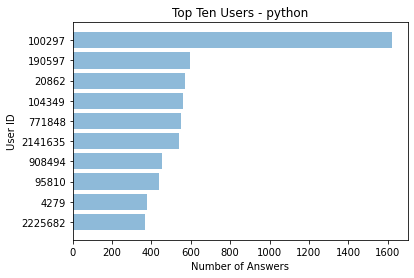

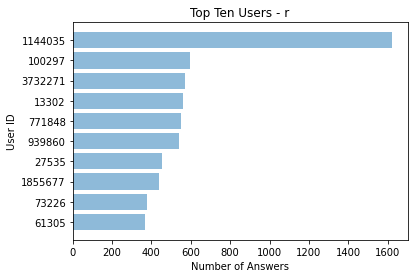

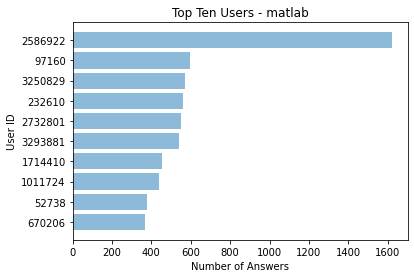

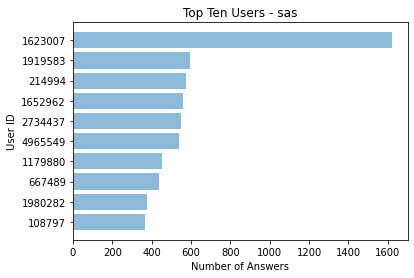

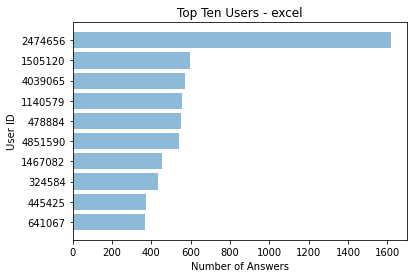

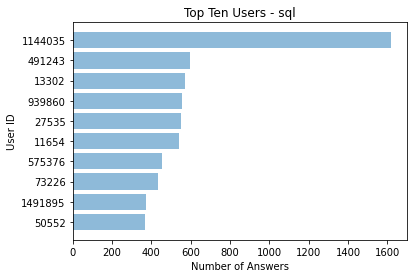

In [314]:
for tag in ds_tags:
  useridlist = [str(int) for int in map_dict[tag].index]
  plt.barh(useridlist, list(map_dict['python']), align='center', alpha=0.5)
  plt.ylabel("User ID") 
  plt.xlabel("Number of Answers") 
  plt.title('Top Ten Users - '+tag)
  plt.show()

In [301]:
Cleaned_up_df['Response_time'] = Cleaned_up_df['A_CreationDate'] - Cleaned_up_df['Q_CreationDate']

In [302]:
Cleaned_up_df

,Q_Id,Q_CreationDate,A_CreationDate,A_Id,A_OwnerUserId,A_Score,Tag,Response_time
0,120,2008-08-01 15:50:08+00:00,2008-09-23 22:41:11+00:00,124363,12734,9,"sql, asp.net, sitemap",53 days 06:51:03
1,580,2008-08-02 23:30:59+00:00,2008-08-02 23:40:04+00:00,585,149,13,"sql-server, sql-server-2005, ...",0 days 00:09:05
2,580,2008-08-02 23:30:59+00:00,2008-08-02 23:51:09+00:00,586,34,17,"sql-server, sql-server-2005, ...",0 days 00:20:10
3,580,2008-08-02 23:30:59+00:00,2008-08-03 00:22:03+00:00,590,116,2,"sql-server, sql-server-2005, ...",0 days 00:51:04
4,580,2008-08-02 23:30:59+00:00,2008-08-03 00:37:03+00:00,591,111,3,"sql-server, sql-server-2005, ...",0 days 01:06:04
...,...,...,...,...,...,...,...,...
388241,40142380,2016-10-19 22:13:40+00:00,2016-10-19 23:15:05+00:00,40142998,6942565,0,"python, unix, split",0 days 01:01:25
388242,40142550,2016-10-19 22:28:58+00:00,2016-10-19 22:38:05+00:00,40142640,4104224,1,"mysql, sql, left-join",0 days 00:09:07
388243,40142860,2016-10-19 23:01:07+00:00,2016-10-19 23:14:50+00:00,40142994,1951885,0,"excel, excel-formula",0 days 00:13:43
388244,40143190,2016-10-19 23:36:01+00:00,2016-10-19 23:38:17+00:00,40143212,1491895,5,"python, bash, multiline",0 days 00:02:16


## Find ID of Top 5 users who have answered most questions 

## Find 50perentile and 75perentile Response time for each of Data Science Tag

In [378]:
top5_dict={}
for tag in ds_tags:
  print(f"Processing {tag}")
  top5_dict[tag] = {}
  userid_list =  Cleaned_up_df[Cleaned_up_df.Tag.astype(str).str.contains(pat=tag)]['A_OwnerUserId'].value_counts()[:5]
  useridlist_str = [str(int) for int in userid_list.index]
  top5_dict[tag]['useridlst'] = ','.join(useridlist_str)
  top5_dict[tag]['resp-50'] = Cleaned_up_df[Cleaned_up_df.Tag.astype(str).str.contains(pat=tag)].groupby(['Q_Id']).min()['Response_time'].describe()[5]
  top5_dict[tag]['resp-75'] = Cleaned_up_df[Cleaned_up_df.Tag.astype(str).str.contains(pat=tag)].groupby(['Q_Id']).min()['Response_time'].describe()[6]


Processing python
Processing r
Processing matlab
Processing sas
Processing excel
Processing sql


In [379]:
top5_dict

{'excel': {'resp-50': Timedelta('0 days 00:37:56.500000'),
  'resp-75': Timedelta('0 days 03:05:28.250000'),
  'useridlst': '2474656,1505120,4039065,1140579,478884'},
 'matlab': {'resp-50': Timedelta('0 days 00:37:42.500000'),
  'resp-75': Timedelta('0 days 03:11:01'),
  'useridlst': '2586922,97160,232610,3250829,2732801'},
 'python': {'resp-50': Timedelta('0 days 00:20:11'),
  'resp-75': Timedelta('0 days 02:24:26'),
  'useridlst': '100297,190597,20862,104349,771848'},
 'r': {'resp-50': Timedelta('0 days 00:27:04'),
  'resp-75': Timedelta('0 days 03:47:01.750000'),
  'useridlst': '1144035,100297,3732271,13302,771848'},
 'sas': {'resp-50': Timedelta('0 days 01:49:45'),
  'resp-75': Timedelta('0 days 15:24:12'),
  'useridlst': '1623007,1919583,214994,2734437,1652962'},
 'sql': {'resp-50': Timedelta('0 days 00:13:34'),
  'resp-75': Timedelta('0 days 01:03:58.750000'),
  'useridlst': '1144035,491243,13302,939860,27535'}}

In [389]:
rowlist=[]
col1=[]
col2=[]
col3=[]

for tag in ds_tags:
  rowlist.append(tag)
  col1.append(top5_dict[tag]['useridlst'])
  col2.append(top5_dict[tag]['resp-50'])
  col3.append(top5_dict[tag]['resp-75'])



In [386]:
rowlist

['python', 'r', 'matlab', 'sas', 'excel', 'sql']

In [390]:
col2

[Timedelta('0 days 00:20:11'),
 Timedelta('0 days 00:27:04'),
 Timedelta('0 days 00:37:42.500000'),
 Timedelta('0 days 01:49:45'),
 Timedelta('0 days 00:37:56.500000'),
 Timedelta('0 days 00:13:34')]

In [405]:

Final_Results = pd.DataFrame(
    {'Top 5 Users who can answer': col1,
     '50%-Response-time': col2,
     '75%-Response-time': col3
    },index=rowlist)

In [406]:
Final_Results

,Top 5 Users who can answer,50%-Response-time,75%-Response-time
python,"100297,190597,20862,104349,771848",0 days 00:20:11,0 days 02:24:26
r,"1144035,100297,3732271,13302,771848",0 days 00:27:04,0 days 03:47:01.750000
matlab,"2586922,97160,232610,3250829,2732801",0 days 00:37:42.500000,0 days 03:11:01
sas,"1623007,1919583,214994,2734437,1652962",0 days 01:49:45,0 days 15:24:12
excel,"2474656,1505120,4039065,1140579,478884",0 days 00:37:56.500000,0 days 03:05:28.250000
sql,"1144035,491243,13302,939860,27535",0 days 00:13:34,0 days 01:03:58.750000


In [407]:
Final_Results['50%-Response-time'] = Final_Results['50%-Response-time'].astype('timedelta64[m]')
Final_Results['75%-Response-time'] = Final_Results['75%-Response-time'].astype('timedelta64[m]')


In [408]:
Final_Results

,Top 5 Users who can answer,50%-Response-time,75%-Response-time
python,"100297,190597,20862,104349,771848",20.0,144.0
r,"1144035,100297,3732271,13302,771848",27.0,227.0
matlab,"2586922,97160,232610,3250829,2732801",37.0,191.0
sas,"1623007,1919583,214994,2734437,1652962",109.0,924.0
excel,"2474656,1505120,4039065,1140579,478884",37.0,185.0
sql,"1144035,491243,13302,939860,27535",13.0,63.0
